In [1]:
import os 

from AEMG.data_utils import TrajectoryDataset
from AEMG.systems.utils import get_system

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from AEMG.models import *

from tqdm.notebook import tqdm

In [2]:
system = get_system("pendulum")
config_fname = "config/pendulum_none_1K.txt"

with open(config_fname, 'r') as f:
    config = eval(f.read())

traj_dataset = TrajectoryDataset(config)

100%|██████████| 1024/1024 [00:01<00:00, 517.97it/s]


In [6]:
# Get the limits
X_min = np.loadtxt(os.path.join(config['model_dir'], 'X_min.txt'), delimiter=',')
X_max = np.loadtxt(os.path.join(config['model_dir'], 'X_max.txt'), delimiter=',')

Since we know that the system is 2D (and we have implemented the transformation), we can plot the collected trajectories in 2D.

  0%|          | 0/1024 [00:00<?, ?it/s]

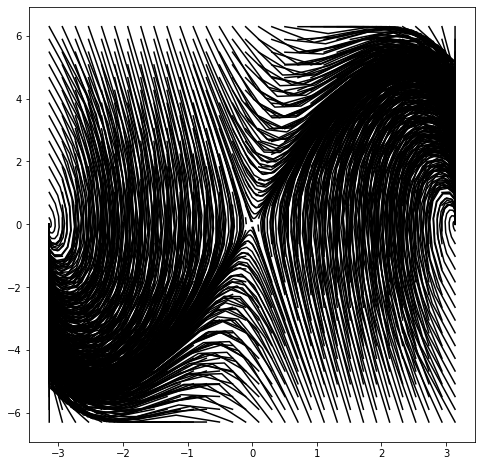

In [14]:
plt.figure(figsize=(8,8))
for i in tqdm(range(len(traj_dataset))):
    tf_traj = []
    for j in range(len(traj_dataset[i])):
        tf_traj.append(system.inverse_transform(traj_dataset[i][j]))
    tf_traj = np.array(tf_traj)
    plt.plot(tf_traj[:,0], tf_traj[:,1], color='black')
plt.show()

In [16]:
encoder  = Encoder(config['high_dims'], config['low_dims'])
decoder  = Decoder(config['low_dims'], config['high_dims'])
dynamics = LatentDynamics(config['low_dims'])

encoder = torch.load(os.path.join(config['model_dir'], 'encoder.pt'))
decoder = torch.load(os.path.join(config['model_dir'], 'decoder.pt'))
dynamics = torch.load(os.path.join(config['model_dir'], 'dynamics.pt'))

In [17]:
true_bounds = system.get_true_bounds()
resolution = 11
traj_len = len(traj_dataset[0])

ts = np.linspace(true_bounds[0,0], true_bounds[0,1], resolution)
tdots = np.linspace(true_bounds[1,0], true_bounds[1,1], resolution)

[[-3.14159265  3.14159265]
 [-6.28318531  6.28318531]]
